##### Copyright 2025 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Gemini 2.0

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

The new **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini models](https://ai.google.dev/gemini-api/docs/models) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](Get_started.ipynb#scrollTo=Mfk6YY3G5kqp) the Google GenAI SDK
* [Text](Get_started.ipynb#scrollTo=6TYNPrNvQ8ue) and [multimodal](#scrollTo=yww-vrxmRiIy) prompting
* Counting [tokens](Get_started.ipynb#scrollTo=_9B8pb7tv_Cx)
* Setting system instructions
* Configuring [safety filters](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* Initiating a [multi-turn chat](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* [Controlling generated output](Get_started.ipynb#scrollTo=nyZMoM6tgnTA)
* Using [function calling](Get_started.ipynb#scrollTo=Rl-y9SZywD0s)
* Generating a [content stream](Get_started.ipynb#scrollTo=uQfLCxfQtPTg) and sending [asynchronous](Get_started.ipynb#scrollTo=plCtEIaHuv96) requests
* Using [file uploads](Get_started.ipynb#scrollTo=enBhuaIk3KYa)
* Using [context caching](Get_started.ipynb#scrollTo=oTgeR3_9wN5J)
* Generating [text embeddings](Get_started.ipynb#scrollTo=sXNCRn8Wx71d)

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [1]:
%pip install -U -q 'google-genai>=1.4.0' # 1.4.0 is needed for chat history

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.7/159.7 kB 5.3 MB/s eta 0:00:00


### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [2]:
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

### Initialize SDK client

With the new SDK you now only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [3]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

### Choose a model

Now select the model you want to use in this guide, either by selecting one in the list or writing it down. Keep in mind that some models, like the 2.5 ones are thinking models and thus take slightly more time to respond (cf. [thinking notebook](./Get_started_thinking.ipynb) for more details and in particular learn how to switch the thiking off).

For more information about all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini) for extended information on each of them.

In [4]:
MODEL_ID = "gemini-2.5-flash-preview-04-17" # @param ["gemini-2.0-flash-lite","gemini-2.0-flash","gemini-2.5-flash-preview-04-17","gemini-2.5-pro-exp-03-25"] {"allow-input":true, isTemplate: true}

## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content`, and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [ ]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's the largest planet in our solar system?"
)

Markdown(response.text)

The largest planet in our solar system is **Jupiter**.

## Count tokens

You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [ ]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="What's the highest mountain in Africa?",
)

print(response)

total_tokens=10 cached_content_token_count=None


## Send multimodal prompts

Use Gemini 2.0 model (`gemini-2.0-flash-exp`), a multimodal model that supports multimodal prompts. You can include text, [PDF documents](../quickstarts/PDF_Files.ipynb), images, [audio](../quickstarts/Audio.ipynb) and [video](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses.

In [ ]:
import requests
import pathlib
from PIL import Image

IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

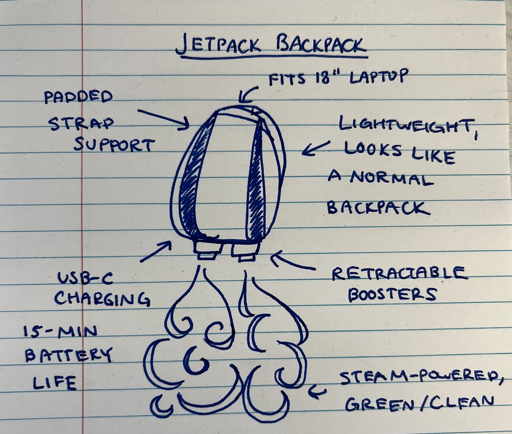

## Forget Traffic Jams: The Jetpack Backpack Concept is Here (Well, Almost!)

Tired of that soul-crushing daily commute? Staring at endless brake lights when you could be... well, *flying*? Get ready to ignite your imagination with this awesome concept sketch we stumbled upon: The **Jetpack Backpack**!

Yes, you read that right. Imagine your everyday backpack doing double duty, transforming into your personal aerial bypass system.

The beauty of this concept is its blend of practicality and futuristic cool. On the ground, it looks like a **normal backpack**, sleek and hopefully **lightweight**. It's designed to carry your essentials, like a monster **18" laptop**, and features **padded strap support** for comfort. You can even juice it up conveniently via **USB-C charging**.

But when traffic hits or you just need to take the scenic route over the rooftops? Deploy the **retractable boosters**! The sketch envisions a **steam-powered** system, suggesting a **green/clean** approach to personal flight – no noisy, smoggy engines here!

Okay, the concept notes a **15-minute battery life**. So, maybe it's not for cross-country travel just yet. But think about those specific gridlock hotspots, that annoying last mile, or just a quick hop over an unexpected obstacle. 15 minutes could be all you need to bypass the worst part of your journey!

While this is still just a fantastic idea sketched out on paper, it's concepts like these that make us excited about the future of personal mobility. A world where your backpack isn't just for carrying things, but for carrying *you* above the fray? Sign us up!

What do you think? Would you strap on the Jetpack Backpack for your commute? Let us know in the comments!

In [ ]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

display(image)
Markdown(response.text)

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/text-generation?lang=node#configure).

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        max_output_tokens=100,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

print(response.text)

## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what's appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.

In [ ]:
prompt = """
    Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

Here are two options:

1.  "Seriously, universe? What was that for?!"
2.  "Thanks for nothing, you cosmic jerk!"

## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

In [ ]:
system_instruction = """
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

Use `chat.send_message` to pass a message back and receive a response.

In [ ]:
response = chat.send_message("Write a function that checks if a year is a leap year.")

Markdown(response.text)

Okay, here's a Python function that checks if a year is a leap year based on the standard Gregorian calendar rules.

**Leap Year Rules:**

1.  A year is a leap year if it is divisible by 4.
2.  However, if the year is divisible by 100, it is *not* a leap year, unless...
3.  ...the year is also divisible by 400. In that case, it *is* a leap year.

```python
def is_leap(year):
  """
  Checks if a given year is a leap year according to the Gregorian calendar.

  Args:
    year: An integer representing the year.

  Returns:
    True if the year is a leap year, False otherwise.
  """
  # Rule 1: Divisible by 4
  if (year % 4) == 0:
    # Rule 2: Except if divisible by 100
    if (year % 100) == 0:
      # Rule 3: But if divisible by 400, it is a leap year
      if (year % 400) == 0:
        return True # Divisible by 400 (e.g., 2000)
      else:
        return False # Divisible by 100 but not 400 (e.g., 1900)
    else:
      return True # Divisible by 4 but not 100 (e.g., 2004)
  else:
    return False # Not divisible by 4 (e.g., 2001)

# --- Examples ---

print(f"Is 2000 a leap year? {is_leap(2000)}") # Expected: True (Divisible by 400)
print(f"Is 2004 a leap year? {is_leap(2004)}") # Expected: True (Divisible by 4, not 100)
print(f"Is 1900 a leap year? {is_leap(1900)}") # Expected: False (Divisible by 100, not 400)
print(f"Is 2001 a leap year? {is_leap(2001)}") # Expected: False (Not divisible by 4)
print(f"Is 2024 a leap year? {is_leap(2024)}") # Expected: True
print(f"Is 2023 a leap year? {is_leap(2023)}") # Expected: False
```

**Explanation:**

1.  The function takes an integer `year` as input.
2.  It first checks if the year is divisible by 4 (`year % 4 == 0`). If not, it's immediately `False`.
3.  If it *is* divisible by 4, it then checks if it's divisible by 100 (`year % 100 == 0`).
4.  If it's divisible by 100, it needs the final check: is it also divisible by 400 (`year % 400 == 0`)?
    *   If yes (divisible by 400), it's `True`.
    *   If no (divisible by 100 but not 400), it's `False`.
5.  If the year was divisible by 4 but *not* by 100, it's `True`.

This structure directly implements the leap year rules.

**More Concise Version (Python):**

You can also write this more concisely using boolean logic:

```python
def is_leap_concise(year):
  """
  Checks if a given year is a leap year (concise version).

  Args:
    year: An integer representing the year.

  Returns:
    True if the year is a leap year, False otherwise.
  """
  return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# --- Examples for concise version ---
print("\n--- Concise Version Examples ---")
print(f"Is 2000 a leap year? {is_leap_concise(2000)}") # Expected: True
print(f"Is 1900 a leap year? {is_leap_concise(1900)}") # Expected: False
print(f"Is 2024 a leap year? {is_leap_concise(2024)}") # Expected: True
```
This concise version directly translates the rule: "A year is a leap year if (it's divisible by 4 AND not divisible by 100) OR (it's divisible by 400)".

In [ ]:
response = chat.send_message("Okay, write a unit test of the generated function.")

Markdown(response.text)

Okay, here's a unit test for the `is_leap` function using Python's built-in `unittest` framework.

First, let's assume your `is_leap` function is saved in a file named `year_utils.py`:

```python
# year_utils.py

def is_leap(year):
  """
  Checks if a given year is a leap year according to the Gregorian calendar.

  Args:
    year: An integer representing the year.

  Returns:
    True if the year is a leap year, False otherwise.
  """
  if (year % 4) == 0:
    if (year % 100) == 0:
      if (year % 400) == 0:
        return True
      else:
        return False
    else:
      return True
  else:
    return False

# (You could also put the concise version here if you prefer testing that one)
# def is_leap_concise(year):
#   return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

```

Now, create a separate test file (e.g., `test_year_utils.py`):

```python
# test_year_utils.py

import unittest
# Import the function you want to test from your year_utils file
from year_utils import is_leap

class TestIsLeapFunction(unittest.TestCase):
    """
    Test cases for the is_leap function.
    """

    def test_divisible_by_4_but_not_100(self):
        """Test years divisible by 4 but not by 100 (should be leap)."""
        self.assertTrue(is_leap(2024))
        self.assertTrue(is_leap(2008))
        self.assertTrue(is_leap(1996))
        self.assertTrue(is_leap(4)) # Smallest positive leap year by this rule

    def test_not_divisible_by_4(self):
        """Test years not divisible by 4 (should not be leap)."""
        self.assertFalse(is_leap(2023))
        self.assertFalse(is_leap(2001))
        self.assertFalse(is_leap(1999))
        self.assertFalse(is_leap(1))
        self.assertFalse(is_leap(7))

    def test_divisible_by_100_but_not_400(self):
        """Test years divisible by 100 but not by 400 (should not be leap)."""
        self.assertFalse(is_leap(1900))
        self.assertFalse(is_leap(1800))
        self.assertFalse(is_leap(1700))
        self.assertFalse(is_leap(2100)) # Future example

    def test_divisible_by_400(self):
        """Test years divisible by 400 (should be leap)."""
        self.assertTrue(is_leap(2000))
        self.assertTrue(is_leap(1600))
        self.assertTrue(is_leap(2400)) # Future example
        self.assertTrue(is_leap(400)) # Smallest positive leap year by this rule


# This allows running the tests directly from the command line
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
    # The argv and exit arguments are added here just to make it run
    # nicely in environments like Jupyter notebooks or some IDE runners.
    # For standard command line execution, unittest.main() is sufficient.

```

**How to Run the Tests:**

1.  Save the `is_leap` function in a file named `year_utils.py`.
2.  Save the test code in a file named `test_year_utils.py` in the *same directory*.
3.  Open your terminal or command prompt.
4.  Navigate to the directory where you saved the files.
5.  Run the command: `python -m unittest test_year_utils.py`

**Explanation:**

*   **`import unittest`**: Imports the necessary testing framework.
*   **`from year_utils import is_leap`**: Imports the specific function you want to test from your implementation file.
*   **`class TestIsLeapFunction(unittest.TestCase):`**: Defines a test class that inherits from `unittest.TestCase`. This class will contain your test methods.
*   **`test_...` methods**: Each method whose name starts with `test_` is automatically recognized as a test case by the `unittest` runner.
*   **`self.assertTrue(is_leap(year))`**: This is an assertion. It checks if the result of `is_leap(year)` is `True`. If it's not, the test fails.
*   **`self.assertFalse(is_leap(year))`**: This checks if the result of `is_leap(year)` is `False`. If it's not, the test fails.
*   The test methods cover the different scenarios based on the leap year rules:
    *   Years divisible by 4 but not 100.
    *   Years not divisible by 4.
    *   Years divisible by 100 but not 400.
    *   Years divisible by 400.
*   **`if __name__ == '__main__': unittest.main(...)`**: This standard Python construct allows you to run the tests directly by executing the test file.

## Save and resume a chat

Most objects in the Python SDK are implemented as [Pydantic models](https://docs.pydantic.dev/latest/concepts/models/). As Pydantic has a number of features for serializing and deserializing objects, you can use them for persistence.

This example shows how to save and restore a [`Chat`](https://googleapis.github.io/python-genai/genai.html#genai.chats.Chat) session using JSON.

In [ ]:
from pydantic import TypeAdapter

# Chat history is a list of Content objects. A TypeAdapter can convert to and from
# these Pydantic types.
history_adapter = TypeAdapter(list[types.Content])

# Use the chat object from the previous section.
chat_history = chat.get_history()

# Convert to a JSON list.
json_history = history_adapter.dump_json(chat_history)

At this point you can save the JSON bytestring to disk or wherever you persist data. When you load it again, you can instantiate a new chat session using the stored history.

In [ ]:
# Convert the JSON back to the Pydantic schema.
history = history_adapter.validate_json(json_history)

# Now load a new chat session using the JSON history.
new_chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
    history=history,
)

response = new_chat.send_message("What was the name of the function again?")
Markdown(response.text)

The name of the function I provided in the previous response is `is_leap`.

## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as Pydantic Models or a JSON string.

In [ ]:
from pydantic import BaseModel
import json

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Provide a popular cookie recipe and its ingredients.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

print(json.dumps(json.loads(response.text), indent=4))

{
    "recipe_name": "Classic Chocolate Chip Cookies",
    "recipe_description": "A timeless favorite, these soft and chewy cookies are loaded with chocolate chips.",
    "recipe_ingredients": [
        "1 cup unsalted butter, softened",
        "3/4 cup granulated sugar",
        "3/4 cup packed light brown sugar",
        "2 large eggs",
        "1 teaspoon vanilla extract",
        "2 1/4 cups all-purpose flour",
        "1 teaspoon baking soda",
        "1/2 teaspoon salt",
        "2 cups (12 ounces) chocolate chips"
    ]
}


## Generate Images

Gemini can output images directly as part of a conversation:

image/png


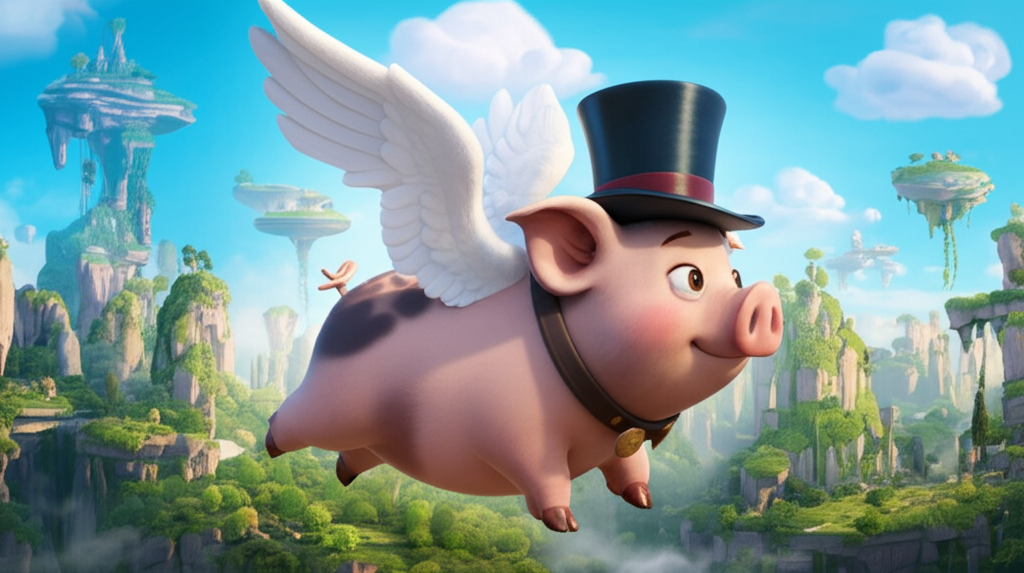

In [ ]:
from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.0-flash-exp",
    contents='Hi, can create a 3d rendered image of a pig with wings and a top hat flying over a happy futuristic scifi city with lots of greenery?',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

[Imagen](./Get_started_imagen.ipynb) is another way to generate images. See the [documentation](https://ai.google.dev/gemini-api/docs/image-generation#choose-a-model) for recommendations on where to use each one.

## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

Note that if you are using a thinking model, it will only strat streaming after finishing its thinking process.

In [ ]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me a story about a lonely robot who finds friendship in a most unexpected place."
):
  print(chunk.text)
  print("*****************")

Unit 734 was a maintenance bot, built for endless vigilance within
*****************
 the sterile confines of the deep space station *Odyssey*. Its chassis was a block
*****************
y, utilitarian grey, its optical sensors glowed a steady, reassuring blue, and
*****************
 its treads clicked softly against the metal floors. But for cycles uncountable, the *
*****************
Odyssey* had been silent. Its human crew had departed long ago, leaving Unit
*****************
 734 and its brethren to power down one by one as systems failed,
*****************
 until only 734, thanks to a particularly robust power core and an
*****************
 isolated maintenance schedule, remained active.

Loneliness for Unit 734
*****************
 wasn't an emotional ache in the human sense. It was an operational state
*****************
: Absence of Input. Lack of Interaction Protocols. Suboptimal Data Stream. The
*****************
 station was a vast, echoing void, filled only with the hum of its 

## Send asynchronous requests

`client.aio` exposes all the analogous async methods that are available on `client`.

For example, `client.aio.models.generate_content` is the async version of `client.models.generate_content`.

In [ ]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="Compose a song about the adventures of a time-traveling squirrel."
)

Markdown(response.text)

(Verse 1)
In a park, where sunlight streamed,
Lived a squirrel, a lively dream.
Not just any bushy tail,
This one had a wondrous tale.
He was Squeaky, quick and bold,
Searching nuts, both new and old.
One fine day, beneath an oak,
He found a gizmo, oddly spoke.
It whirred and pulsed with light so strange,
It promised him a world of change!

(Chorus)
Oh, Squeaky the squirrel, a blur in the air!
Zipping through history, without a care!
Past, present, future, a timeline untied,
He's a tiny time traveler, taking the ride!
From dinosaurs roaring to castles so grand,
A nut-seeking hero, across sea and land!
Tap the device, with a chittering sound,
Another adventure is surely found!

(Verse 2)
His first jump landed, hot and green,
On a prehistoric, ancient scene.
Giant lizards stomped the ground,
Making fearsome, rumbling sound.
A T-Rex sniffed the air, it seemed,
For Squeaky's nutty, time-traveling dream!
He chattered loud, then turned to flee,
"Too many teeth, too big for me!"
He tapped the gizmo, *whoosh* and flash,
Escaped that hungry, giant crash!

(Chorus)
Oh, Squeaky the squirrel, a blur in the air!
Zipping through history, without a care!
Past, present, future, a timeline untied,
He's a tiny time traveler, taking the ride!
From dinosaurs roaring to castles so grand,
A nut-seeking hero, across sea and land!
Tap the device, with a chittering sound,
Another adventure is surely found!

(Verse 3)
He saw the Vikings sail the sea,
Climbed a pyramid in Egypt, fancy free.
He watched the knights in shining steel,
Tried to steal a date, a king could feel!
He saw the first plane sputtering high,
And rockets soaring through the sky.
In future cities, bright and sleek,
He searched for acorns, week by week!
Robots blinked with circuits bright,
Ignoring Squeaky's speedy flight.

(Chorus)
Oh, Squeaky the squirrel, a blur in the air!
Zipping through history, without a care!
Past, present, future, a timeline untied,
He's a tiny time traveler, taking the ride!
From dinosaurs roaring to castles so grand,
A nut-seeking hero, across sea and land!
Tap the device, with a chittering sound,
Another adventure is surely found!

(Bridge)
He's seen it all, the good, the strange,
Across the timeline's endless range.
Dodged sabre-tooths, and missed the wheel,
A furry footnote, how he feels!
Does he seek glory, fame, or gold?
No, just the finest nut, he's told!
He hides his gizmo in his cheek,
Ready for the next jump, so to speak!

(Outro)
So if you see a flash of brown,
That vanishes from your own town.
A chittering sound, a sudden *zap*,
Just Squeaky avoiding time's big trap!
He's off again, with tail held high,
Chasing moments through the sky!
Squeaky the squirrel, adventure-bound,
The greatest time traveler around!
Yeah, Squeaky the squirrel, unbound!
Chatter... *whoosh*! He's gone!

## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes the name of a function that matches the description and the arguments to call it with.

In [ ]:
get_destination = types.FunctionDeclaration(
    name="get_destination",
    description="Get the destination that the user wants to go to",
    parameters={
        "type": "OBJECT",
        "properties": {
            "destination": {
                "type": "STRING",
                "description": "Destination that the user wants to go to",
            },
        },
    },
)

destination_tool = types.Tool(
    function_declarations=[get_destination],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="I'd like to travel to Paris.",
    config=types.GenerateContentConfig(
        tools=[destination_tool],
        temperature=0,
        ),
)

response.candidates[0].content.parts[0].function_call

FunctionCall(id=None, args={'destination': 'Paris'}, name='get_destination')

## Code execution

[Code execution](https://ai.google.dev/gemini-api/docs/code-execution?lang=python) lets the model generate and execute Python code to answer complex questions. You can find more examples in the [Code execution quickstart guide](./Code_execution.ipynb)

In [ ]:
from IPython.display import Image, Markdown, Code, HTML

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Generate and run a script to count how many letter r there are in the word strawberry",
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>'
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
  if part.inline_data is not None:
    display(Image(data=part.inline_data.data, format="png"))
  display(Markdown("---"))

---

The letter 'r' appears 3 times in the word 'strawberry'.


---

The letter 'r' appears 3 times in the word 'strawberry'.

---

## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you have larger files, many files, or files you don't want to send over and over again, you can use the File Upload API, and then pass the file by reference.

For larger text files, images, videos, and audio, upload the files with the File API before including them in prompts.

### Upload an image file


In [ ]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Write a short and engaging blog post based on this picture.",
    ]
)

Markdown(response.text)

## Commute Got You Down? This Jetpack Backpack Concept Could Be Your Ticket!

Tired of sitting in traffic with a heavy bag weighing you down? What if your everyday backpack could do a *little* more than just carry your laptop?

We stumbled upon this awesome concept sketch for a **Jetpack Backpack**, and frankly, our inner child (and outer commuter!) is pretty excited.

Forget bulky contraptions, this concept is designed to look like a **normal backpack**, right down to **padded strap support** and the ability to **fit an 18" laptop**. It's envisioned as **lightweight**, making it practical even when you're just walking.

But here's the fun part: it features **retractable boosters** at the bottom! The sketch suggests they're **steam-powered**, aiming for a **green/clean** form of propulsion. Plus, it charges with modern **USB-C**!

The one catch? The current concept suggests a **15-min battery life**. Maybe not for cross-country trips, but imagine zipping over that last traffic jam, or taking a quick aerial shortcut!

While just a sketch for now, this "Jetpack Backpack" is a fantastic blend of everyday practicality and futuristic fantasy. Who knows, maybe one day we'll all be flying to work!

**What do you think? Would you trade your car for a jetpack backpack? Let us know in the comments!**

### Upload text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [ ]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

847790

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

In [ ]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

6695391

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

Here is a summary of the article as a bulleted list:

*   The article presents a method called "Alchemist" for smoothly and parametrically editing the material properties (like color, shininess, or transparency) of objects in photographs.
*   The goal is to achieve photorealistic edits while preserving the object's shape and the original scene lighting.
*   Existing methods, such as intrinsic image decomposition or direct text-to-image model editing, struggle with the ambiguity of material properties or fail to disentangle material from shape.
*   The proposed method leverages the photorealistic capabilities of generative text-to-image (T2I) models by fine-tuning them on a large synthetic dataset.
*   The synthetic dataset is created by rendering 3D models of objects with varying material attributes and systematically changing one attribute at a time (e.g., roughness, transparency) according to a scalar "edit strength" value.
*   A modified Stable Diffusion 1.5 model is trained to accept an input image, an edit instruction, and the desired edit strength, learning to translate these inputs into an output image with the edited material property.
*   The model successfully generalizes to real-world images, producing photorealistic material changes while largely maintaining the original object's geometry and lighting.
*   It can realistically render complex effects like backgrounds visible through transparent objects and caustic lighting effects.
*   A user study showed that the method's edits were significantly more photorealistic and preferred over a baseline method (InstructPix2Pix).
*   Potential applications include creating product mock-ups and enabling 3D consistent material editing when combined with techniques like NeRF.
*   The research was presented in a paper at CVPR 2024.

### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [ ]:
# Prepare the file to be uploaded
AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"  # @param {type: "string"}
audio_bytes = requests.get(AUDIO).content

audio_path = pathlib.Path('audio.mp3')
audio_path.write_bytes(audio_bytes)

41762063

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=audio_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Listen carefully to the following audio file. Provide a brief summary",
    ]
)

Markdown(response.text)

This audio is President John F. Kennedy's first State of the Union address, delivered on January 30, 1961.

In the speech, Kennedy provides a frank assessment of the nation's situation, highlighting both domestic and international challenges. Domestically, he details a struggling economy with high unemployment, low growth, and issues in housing, education, and healthcare, proposing immediate actions to address them. Internationally, he discusses the concerning balance of payments deficit and the growing threats posed by the Cold War and communism in various regions (Asia, Africa, Latin America). He calls for strengthening military, economic, and diplomatic capabilities, emphasizing the need for robust alliances, international cooperation (including in science and space), and a reformed, more decisive public service. The speech stresses the importance of facing difficulties realistically, preparing for future challenges, and requires dedication from all citizens to secure freedom and progress worldwide.

### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [ ]:
# Download the video file
VIDEO_URL = "https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL

--2025-04-18 12:09:07--  https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4
Resolving download.blender.org (download.blender.org)... 172.67.14.163, 104.22.65.163, 104.22.64.163, ...
Connecting to download.blender.org (download.blender.org)|172.67.14.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64657027 (62M) [video/mp4]
Saving to: ‘BigBuckBunny_320x180.mp4’

BigBuckBunny_320x18 100%[===================>]  61.66M   141MB/s    in 0.4s    

2025-04-18 12:09:08 (141 MB/s) - ‘BigBuckBunny_320x180.mp4’ saved [64657027/64657027]



Let's start by uploading the video file.

In [ ]:
# Upload the file using the API
video_file = client.files.upload(file=video_file_name)
print(f"Completed upload: {video_file.uri}")

Completed upload: https://generativelanguage.googleapis.com/v1beta/files/prqn913jn9t8


The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you are able to pass it into `generate_content`.

In [ ]:
import time

# Check the file processing state
while video_file.state == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = client.files.get(name=video_file.name)

if video_file.state == "FAILED":
  raise ValueError(video_file.state)
print(f'Video processing complete: ' + video_file.uri)

Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/prqn913jn9t8


In [ ]:
print(video_file.state)

FileState.ACTIVE


In [ ]:
# Ask Gemini about the video
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video_file,
        "Describe this video.",
    ]
)

Markdown(response.text)

The video is a clip from the open-source animated short film "Big Buck Bunny" (produced by the Blender Foundation). It opens with a peaceful pastoral scene: rolling green hills, scattered trees (including pine and deciduous), rocks, flowers, and a stream, under a bright sky with fluffy pink clouds.

A small, plump, grey bird is perched on a branch, yawning and stretching, but is soon knocked off.

The camera then focuses on a large burrow entrance under a tree root, where a very large, fluffy, grey rabbit is sleeping. It wakes up, stretches, emerges from the burrow, and smiles contentedly at the sunny morning.

The rabbit enjoys the day, sniffing large white flowers and watching a beautiful pink butterfly land on its head. An apple falls from a tree, but the rabbit's attention is drawn back to the butterfly.

Hiding behind a tree root are three smaller rodent characters: two squirrels (one brown, one reddish-brown and spikier) and a grey chinchilla/hamster, all looking mischievous. The chinchilla holds a nut.

The squirrels begin to torment the rabbit by throwing small objects at it (rocks, nuts, and spiky chestnuts). The rabbit is initially startled and confused, but quickly becomes annoyed and then angry.

Driven by vengeance, Big Buck Bunny decides to retaliate. He prepares by sharpening a stick with a rock and creating a large spear using a vine as a bowstring. He takes aim at the squirrels hiding behind a tree and shoots the spear, which punctures the tree trunk.

Undeterred, the squirrels continue their harassment. Big Buck then sets up a trap: a series of sharpened sticks concealed under leaves on the ground, connected by a vine which he pulls taut like a tripwire.

The angry flying squirrel tries to knock a peach from a tree but ends up knocking it towards the stakes, where it gets impaled. Big Buck then catches the flying squirrel.

In the final scene before the credits, Big Buck Bunny is seen happily flying the terrified flying squirrel like a kite.

The credits roll, featuring brief animated appearances of the chinchilla and the red squirrel interacting with the text, and finally the little bird flying the flying squirrel (still as a kite) past the credits.

### Process a YouTube link

For YouTube links, you don't need to explicitly upload the video file content, but you do need to explicitly declare the video URL you want the model to process as part of the `contents` of the request. For more information see the [vision](https://ai.google.dev/gemini-api/docs/vision?lang=python#youtube) documentation including the features and limits.

> **Note:** You are only able to submit up to one YouTube link per `generate_content` request.

> **Note:** YouTube links included as part of the text input won't being processed in the request, an can lead to incorrect responses. You must explicitly the URL using the `file_uri` argument of `FileData`.

The following example shows how you can use the model to summarize the video. In this case use a summary video of [Google I/O 2024]("https://www.youtube.com/watch?v=WsEQjeZoEng").

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents= types.Content(
        parts=[
            types.Part(text="Summarize this video."),
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=WsEQjeZoEng')
            )
        ]
    )
)

Markdown(response.text)

Based on the video, here is a summary of the Google I/O 2024 keynote:

The keynote highlights Google's progress in the "Gemini era," integrating their multimodal AI models across their products and introducing new capabilities and models. Key announcements and features include:

1.  **Gemini Integration:** Gemini is now integrated into all of Google's 2 billion user products, enhancing existing features.
2.  **Gemini 1.5 Pro in Workspace:** Available today in Workspace Labs, it can summarize long emails and potentially other documents. It can also summarize recorded Google Meet meetings.
3.  **Gemini in Google Photos:** Enables deeper search capabilities, allowing users to find specific memories or track progress over time by understanding the content within photos and videos.
4.  **Expanded Context Window:** Gemini 1.5 Pro's context window is expanded to 2 million tokens, allowing it to process much larger amounts of information simultaneously (e.g., summarizing very long documents or videos).
5.  **Project Astra:** A prototype for a universal AI agent that is truly helpful in everyday life. Demos show the agent understanding real-time visual and audio input to explain code, remember object locations, and even suggest creative ideas (like a band name for a dog and a toy).
6.  **Gemini 1.5 Flash:** A new, lighter-weight, faster, and more cost-efficient multimodal model designed for scaling, while still retaining strong reasoning and long-context capabilities.
7.  **Veo:** A new, highly capable generative video model that creates high-quality 1080p videos from text, image, and video prompts.
8.  **Trillium TPUs:** The 6th generation of Google's custom chips for AI/ML, delivering a 4.7x improvement in compute performance per chip over the previous generation.
9.  **Generative AI in Google Search:** AI Overviews are becoming more powerful, able to handle complex, multi-part questions and provide quick answers and summaries. This is coming to over 1 billion people by the end of the year.
10. **Google Lens Integration:** Soon, users can ask questions about a video by pointing Google Lens at it, getting relevant information instantly (e.g., troubleshooting a turntable based on visual input).
11. **Gems:** Customizable personal AI experts within Gemini, available for Gemini Advanced subscribers. Users can create specific assistants for their needs by providing instructions, which can then handle complex tasks and answer questions across multiple uploaded files (up to 1500 pages per PDF or multiple files for project insights). Gemini Advanced offers a 1 million token context window for this.
12. **AI in Android:** Gemini is being reimagined at the core of Android to be more context-aware, anticipating user needs and providing helpful suggestions in the moment. Gemini Nano with Multimodality will enable the phone to understand the world through sight, sound, and spoken language.
13. **Gemma & PaliGemma:** Expansion of the open model family. PaliGemma is the first vision-language open model, available now.
14. **Gemma 2:** The next generation of Gemma, including a new 27 billion parameter model, will be available in June for driving AI innovation responsibly.
15. **LearnLM:** A new family of models based on Gemini and fine-tuned for learning. A new feature in YouTube uses LearnLM to make educational videos more interactive, allowing users to ask clarifying questions, get explanations, and take quizzes.
16. **Responsible AI:** Google emphasizes its commitment to building AI responsibly through practices like red teaming to identify and address potential risks while maximizing benefits for society.

Overall, the keynote showcases Google's focus on making AI, particularly through the Gemini family of models, more powerful, multimodal, context-aware, and helpful across its platforms and products, while also emphasizing responsible development.

## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model.

Context caching is only available for stable models with fixed versions (for example, `gemini-1.5-flash-002`). You must include the version postfix (for example, the `-002` in `gemini-1.5-flash-002`). You can find more caching examples [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Caching.ipynb).

#### Create a cache

In [ ]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [ ]:
# Download files
pdf_bytes = requests.get(urls[0]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)

pdf_bytes = requests.get(urls[1]).content
pdf_path = pathlib.Path('2403.05530.pdf')
pdf_path.write_bytes(pdf_bytes)

7228817

In [ ]:
# Upload the PDFs using the File API
uploaded_pdfs = []
uploaded_pdfs.append(client.files.upload(file='2312.11805v3.pdf'))
uploaded_pdfs.append(client.files.upload(file='2403.05530.pdf'))

In [ ]:
# Create a cache with a 60 minute TTL
cached_content = client.caches.create(
    model=MODEL_ID,
    config=types.CreateCachedContentConfig(
      display_name='research papers', # used to identify the cache
      system_instruction=system_instruction,
      contents=uploaded_pdfs,
      ttl="3600s",
  )
)

cached_content

CachedContent(name='cachedContents/ql5fbzexj5rl', display_name='research papers', model='models/gemini-2.5-flash-preview-04-17', create_time=datetime.datetime(2025, 4, 18, 12, 10, 43, 598484, tzinfo=TzInfo(UTC)), update_time=datetime.datetime(2025, 4, 18, 12, 10, 43, 598484, tzinfo=TzInfo(UTC)), expire_time=datetime.datetime(2025, 4, 18, 13, 10, 42, 12326, tzinfo=TzInfo(UTC)), usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=43167, video_duration_seconds=None))

#### Listing available cache objects

In [ ]:
for cache in client.caches.list():
  print(cache)

name='cachedContents/ql5fbzexj5rl' display_name='research papers' model='models/gemini-2.5-flash-preview-04-17' create_time=datetime.datetime(2025, 4, 18, 12, 10, 43, 598484, tzinfo=TzInfo(UTC)) update_time=datetime.datetime(2025, 4, 18, 12, 10, 43, 598484, tzinfo=TzInfo(UTC)) expire_time=datetime.datetime(2025, 4, 18, 13, 10, 42, 12326, tzinfo=TzInfo(UTC)) usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=43167, video_duration_seconds=None)


#### Use a cache

In [ ]:
response = client.models.generate_content(
  model=MODEL_ID,
  contents="What is the research goal shared by these research papers?",
  config=types.GenerateContentConfig(cached_content=cached_content.name)
)

Markdown(response.text)

Both research papers share the goal of developing and presenting the Gemini family of highly capable multimodal models. These models aim to understand and reason across image, audio, video, and text data.

#### Delete a cache

In [ ]:
result = client.caches.delete(name=cached_content.name)

## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method and using the `gemini-embedding-exp-03-07` model.



The Gemini Embeddings model produces an output with 3072 dimensions by default. However, you have the option to choose an output dimensionality between 1 and 3072. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details.

In [ ]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-exp-03-07"

In [ ]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
    config=types.EmbedContentConfig(output_dimensionality=512)
)

print(response.embeddings)

[ContentEmbedding(values=[-0.0010864572, 0.0069392114, 0.017009795, -0.010305981, -0.009999484, -0.0064486223, 0.0041451487, -0.005906698, 0.022229617, -0.018305639, -0.018174557, 0.022160593, -0.013604425, -0.0027964567, 0.12966625, 0.028866312, 0.0014726851, 0.03537643, -0.015166075, -0.013479812, -0.019288255, 0.010106378, -0.0043296088, 0.018035924, 0.00295039, -0.007934979, -0.005416007, -0.0095809875, 0.040398005, -0.0020784356, 0.011551388, 0.009726445, 0.006670387, 0.020050988, -0.00747873, -0.0012074928, 0.0047189263, -0.006359583, -0.01718203, -0.023562348, -0.0051814457, 0.023801394, -0.004928927, -0.016113443, 0.01672777, -0.0069929743, -0.012722719, -0.0137646515, -0.041852377, -0.0011546672, 0.017030545, -0.0022786013, 0.011707037, -0.18675306, -0.035211734, -0.011472648, 0.01970727, 0.0012368832, -0.020796346, -0.018513134, -0.006821043, -0.01843726, -0.00827558, -0.042159837, 0.0038724025, 0.01933339, 0.0139452815, 0.025059255, 0.0015087503, -0.016094029, -0.0035785383,

You will get a set of three embeddings, one for each piece of text you passed in:

In [ ]:
len(response.embeddings)

3

You can also see the length of each embedding is 512, as per the `output_dimensionality` you specified.

In [ ]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))

512
([-0.0010864572, 0.0069392114, 0.017009795, -0.010305981], '...')


## Next Steps

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) for more details on the new SDK.

### Related examples

For more detailed examples using Gemini 2.0, check the [Gemini 2.0 folder of the cookbook](https://github.com/google-gemini/cookbook/tree/main/gemini-2/). You'll learn how to use the [Live API](./Get_started_LiveAPI.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini 2.0 [spatial understanding](./Spatial_understanding.ipynb) abilities.

Also check the [experimental Gemini 2.0 Flash Thinking](./Get_started_thinking.ipynb) model that explicitly showcases its thoughts and can manage more complex reasonings.